# pandas

摘自 《利用Python进行数据分析》 第五章：Pandas入门


In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## 数据结构
### Series

In [2]:
obj1=  Series([4, 7, -5, 3], index=['d', 'b', 'c', 'a'])
obj1

d    4
b    7
c   -5
a    3
dtype: int64

In [3]:
obj1['d']

4

In [5]:
np.exp(obj1)

d      54.598150
b    1096.633158
c       0.006738
a      20.085537
dtype: float64

In [6]:
obj1[obj1>0]

d    4
b    7
a    3
dtype: int64

In [8]:
# in
'b' in obj1

True

In [10]:
# 也可通过字典创建series
sdata = {'Ohio':35000, 'Texas':71000}
obj3 =  Series(sdata)
obj3

Ohio     35000
Texas    71000
dtype: int64

In [11]:
# 也可以这样创建：
states = ['California', 'Ohio', 'Texas']
obj4 = Series(sdata, index=states)
obj4
# 可以看到会根据索引和字典key进行匹配。没有配对上的即为NaN空值

California        NaN
Ohio          35000.0
Texas         71000.0
dtype: float64

In [12]:
# 可以检测空值 —— 缺失数据
pd.isnull(obj4)

California     True
Ohio          False
Texas         False
dtype: bool

In [13]:
pd.notnull(obj4)

California    False
Ohio           True
Texas          True
dtype: bool

In [14]:
# 也可通过obj对象自身的空值检测
obj4.isnull()

California     True
Ohio          False
Texas         False
dtype: bool

In [15]:
# Series在算术运算中，会自动根据索引来对齐（匹配）数据
obj3

Ohio     35000
Texas    71000
dtype: int64

In [16]:
obj4

California        NaN
Ohio          35000.0
Texas         71000.0
dtype: float64

In [17]:
obj3 + obj4
# numpy因为没有索引，就只是根据位置序号来相加

California         NaN
Ohio           70000.0
Texas         142000.0
dtype: float64

In [18]:
# name属性
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Texas         71000.0
Name: population, dtype: float64

In [19]:
# 也可以就地修改Series的索引
obj4.index = ['Ca', 'Oh', 'Te']
obj4

Ca        NaN
Oh    35000.0
Te    71000.0
Name: population, dtype: float64

### DataFrame

In [20]:
# 通过字典创建
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada'],
       'year': [2000, 2001, 2002, 2001],
       'pop': [1.5, 1.7, 3.6, 2.4]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001


In [23]:
# 可以指定列的顺序
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
         index= ['one', 'two', 'three', 'four'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN


In [24]:
# 从dataframe中获取某一列。 注意，具有与df相同的列名和索引
frame2['year']

one      2000
two      2001
three    2002
four     2001
Name: year, dtype: int64

In [25]:
frame2.year

one      2000
two      2001
three    2002
four     2001
Name: year, dtype: int64

In [26]:
# 获取行
frame2.ix['three']

C:\Users\xindo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [27]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [29]:
# 为列赋值
frame2['debt'] = np.arange(4)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3


In [30]:
# 如果赋值的是有索引的series，则可以按照索引配对进行赋值，没配上对的则都是NaN
val = Series([-1, -1.5, 1.7], index=['two', 'three', 'four'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.0
three,2002,Ohio,3.6,-1.5
four,2001,Nevada,2.4,1.7


In [31]:
# 为不存在的列赋值，创建新列
frame2['east'] = 1
frame2

,year,state,pop,debt,east
one,2000,Ohio,1.5,NaN,1
two,2001,Ohio,1.7,-1.0,1
three,2002,Ohio,3.6,-1.5,1
four,2001,Nevada,2.4,1.7,1


In [32]:
# del 删除列
del frame2['east']

In [33]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.0
three,2002,Ohio,3.6,-1.5
four,2001,Nevada,2.4,1.7


In [35]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [36]:
# 以二维ndarray的方式返回df中的值
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.0],
       [2002, 'Ohio', 3.6, -1.5],
       [2001, 'Nevada', 2.4, 1.7]], dtype=object)

### 索引对象

In [37]:
frame2.index
# 索引是一种单独的Index类型的对象

Index(['one', 'two', 'three', 'four'], dtype='object')

In [38]:
# 索引不支持直接赋值修改
frame2.index[1] = 'd'

TypeError: Index does not support mutable operations

In [39]:
# 可以手动创建index对象
index = pd.Index(np.arange(3))

In [40]:
# 创建se/df时可以指定此index对象。可以多次指定用此index对象，从而实现安全共享index。
obj5 = Series([1.5, 2.2, 3.3], index=index)
obj5

0    1.5
1    2.2
2    3.3
dtype: float64

index提供了一些修改index的方法，如append、diff、union、delete等，具体见书


## 基本功能
### 重新索引

In [41]:
obj6 = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj6

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [42]:
# 根据传入的索引，进行索引重排
obj7 = obj6.reindex(['a', 'b', 'c', 'd', 'e'])
obj7

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [44]:
obj6 #6本身未变

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [43]:
# 可指定重排时缺失值的默认填充值
obj7 = obj6.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
obj7

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [45]:
# 重排索引时的插值处理
obj8 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj8

0      blue
2    purple
4    yellow
dtype: object

In [46]:
obj8.reindex(range(6), method='ffill') # ffill表示向前填充

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [47]:
# 对于DataFrame，可以修改行列索引
frame3 = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], 
                   columns=['Ohio', 'Texas', 'California'])
frame3

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [48]:
# 只传一个参数的话，默认是对行重新索引
frame4 = frame3.reindex(['a', 'b', 'c', 'd'])
frame4

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [50]:
frame3

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [56]:
states = ['Texas', 'Ohio', 'Utah']
# 使用columns指定对列的重新索引
frame5 = frame3.reindex(columns=states)
frame5

,Texas,Ohio,Utah
a,1,0,NaN
c,4,3,NaN
d,7,6,NaN


### drop丢弃指定轴上的项

In [57]:
# 对于series
obj9 = Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
obj9

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [58]:
obj10 = obj9.drop(['d', 'c'])
obj10

a    0
b    1
e    4
dtype: int32

In [59]:
# 对于DataFrame，可以指定轴
data3 = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'NY'],
                 columns=['one', 'two', 'three', 'four'])
# 默认删行
data3.drop(['Colorado'])

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
NY,12,13,14,15


In [60]:
data3.drop('two')

ValueError: labels ['two'] not contained in axis

In [61]:
# 删列则需要显式指定axis=1
data3.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NY,12,14,15


### 索引、选取和过滤

In [70]:
# series
obj11 = Series(np.arange(4), index=['a', 'd', 'c', 'b'])
obj11['b']

3

In [71]:
obj11[1]

1

In [72]:
obj11[['a','b']]

a    0
b    3
dtype: int32

In [73]:
obj11[obj11<2]

a    0
d    1
dtype: int32

In [74]:
obj11['c':'b'] #注意，这里的切片包含末端。python中的切片不包含末端下标

c    2
b    3
dtype: int32

In [75]:
obj11['c':'b'] = 5
obj11

a    0
d    1
c    5
b    5
dtype: int32

In [81]:
# data frame
data4 = DataFrame(np.arange(16).reshape((4,4)),
                 index=['one', 'Colorado', 'Utah', 'NewYork'],
                 columns=['one', 'two', 'three', 'four'])
data4

,one,two,three,four
one,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


data frame的选取操作感觉比较凌乱。

下面先说一下采用 **data4[内容]** 这种方式

In [82]:
# 【1】单个标签的方式  是对列进行选择
data4['one'] #虽然重名， 但这里可见是one是对列的选择

one          0
Colorado     4
Utah         8
NewYork     12
Name: one, dtype: int32

In [85]:
# 【2】含有：的切片方式，是对行进行选择
data4[:2]

,one,two,three,four
one,0,1,2,3
Colorado,4,5,6,7


In [94]:
data4['one':'three'] # 这是不可以的，[：] 是对行的选择

KeyError: 'three'

In [96]:
data4['one':'Utah'] # 果然是对行的选择

,one,two,three,four
one,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [97]:
# 【3】传入一个下标数字，既不可以行也不可以列
data4[2] 

KeyError: 2

In [83]:
# 【4】如果传入一维布尔数组，则是选择行
data4[data4['one']>5] # 选择出one字段大于5的行 = =

,one,two,three,four
Utah,8,9,10,11
NewYork,12,13,14,15


In [98]:
# 【5】如果传入同样大小的二维数组，则是行列同时选。类似numpy
data4[data4>5]

,one,two,three,four
one,NaN,NaN,NaN,NaN
Colorado,NaN,NaN,6.0,7.0
Utah,8.0,9.0,10.0,11.0
NewYork,12.0,13.0,14.0,15.0


通过 **ix/loc/iloc** 可以同时对行和列进行选择

In [88]:
# 要选择行，可以通过ix方法，可以同时传入对列的选择哟
data4.ix['Utah', ['two', 'three']]

C:\Users\xindo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


two       9
three    10
Name: Utah, dtype: int32

In [99]:
data4.loc['Utah']

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [90]:
#可同时传入对列的筛选。
data4.loc['Utah', ['two','three']]

two       9
three    10
Name: Utah, dtype: int32

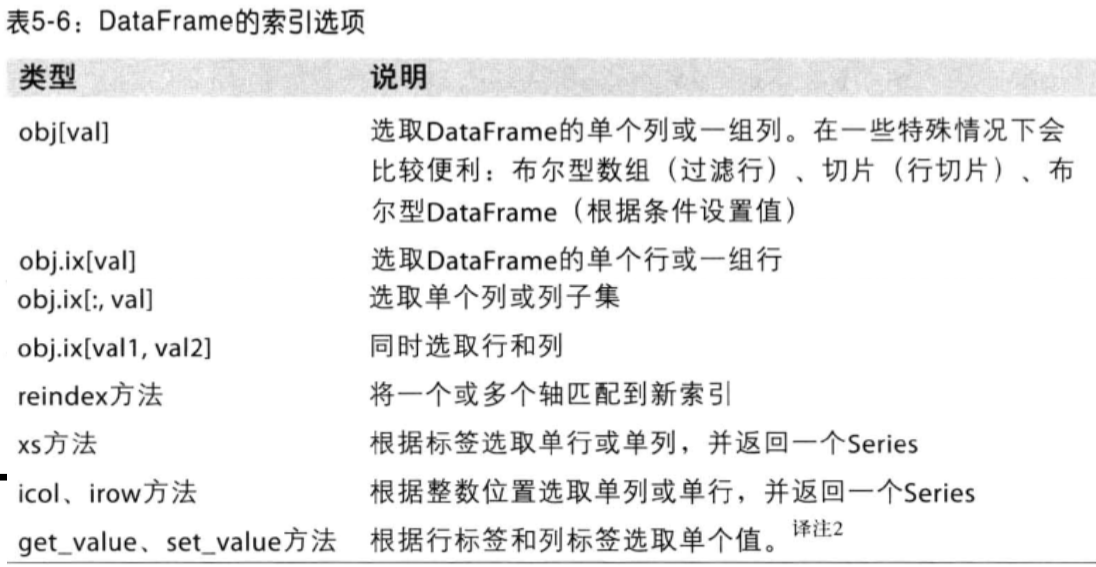

## 算术运算和数据对齐

### 对齐和缺失值填充

In [2]:
# 算术运算，自动根据索引进行对齐
# Series
s1 = Series([1,2,3], index=['a','b','c'])
s2 = Series([1,2,3,4], index=['a','b','d','c'])
s1 + s2
# 注意，索引d处的值为nan

a    2.0
b    4.0
c    7.0
d    NaN
dtype: float64

In [3]:
# DataFrame，要求行列索引都要对齐，有任何对不齐的都会变成NaN

# 如果希望指定缺失填充值，可以用fill_value
s1.add(s2, fill_value=0)
# 注意，不是最终结果变为0，而是在计算前将其中缺失一方的值记为0，加上另一方的值

a    2.0
b    4.0
c    7.0
d    3.0
dtype: float64

add加法，sub减法，div除法，mul乘法。

### DataFrame和Series之间的运算

In [7]:
# 默认是按照列索引进行匹配，然后对各行都执行相同操作
# 先看numpy中的例子
arr10 = np.arange(12).reshape((3,4))
arr10

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
arr10[0]

array([0, 1, 2, 3])

In [10]:
arr10 - arr10[0]

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [12]:
# 在pandas中的df和series也是这样
frame10 = DataFrame(np.arange(12).reshape((4,3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series10 = frame10.iloc[0]
frame10
# 如果bde这种列的索引，在两者之间不能匹配上，则结果中会都变成NaN

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [15]:
series10

b    0
d    1
e    2
Name: Utah, dtype: int32

In [16]:
frame10 - series10

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [18]:
# 如果希望是匹配行，并且在列上广播，则需要调用方法
series11 = frame10['d']
series11

Utah       1
Ohio       4
Texas      7
Oregon    10
Name: d, dtype: int32

In [19]:
frame10.sub(series11, axis=0)
# axis说明是在0轴上进行匹配

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


### apply 和 applymap方法

In [21]:
# numpy中的一些元素级数组方法，也可以用于pandas对象，比如abs
frame11 = DataFrame(np.random.randn(4,3), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame11

,b,d,e
Utah,-0.543726,0.586586,-0.654696
Ohio,-1.039431,0.144162,0.870128
Texas,-0.216221,-0.000563,0.601167
Oregon,1.356383,1.118972,-0.708455


In [22]:
np.abs(frame11)

,b,d,e
Utah,0.543726,0.586586,0.654696
Ohio,1.039431,0.144162,0.870128
Texas,0.216221,0.000563,0.601167
Oregon,1.356383,1.118972,0.708455


In [23]:
# apply可以将函数应用到各行/列所形成的一维数组上，即，以行/列为单位处理
# 先定义一个函数为最大值减最小值
f11 = lambda x: x.max() - x.min()

In [25]:
# 默认apply是对行的操作，即axis=0，对每一列，计算各行的极差
frame11.apply(f11)

b    2.395813
d    1.119535
e    1.578583
dtype: float64

In [27]:
# 可以指定在axis=1上，即，对每一行，计算各列的极差
frame11.apply(f11, axis=1)

Utah      1.241282
Ohio      1.909559
Texas     0.817388
Oregon    2.064837
dtype: float64

In [28]:
# applymap是元素级的函数
format11 = lambda x: '%.2f' % x
frame11

,b,d,e
Utah,-0.543726,0.586586,-0.654696
Ohio,-1.039431,0.144162,0.870128
Texas,-0.216221,-0.000563,0.601167
Oregon,1.356383,1.118972,-0.708455


In [32]:
frame11.applymap(format11)

,b,d,e
Utah,-0.54,0.59,-0.65
Ohio,-1.04,0.14,0.87
Texas,-0.22,-0.00,0.60
Oregon,1.36,1.12,-0.71


In [34]:
# 上面之所以叫applymap，因为Series有一个应用于元素级函数的map方法了
frame11['e'].map(format11)

Utah      -0.65
Ohio       0.87
Texas      0.60
Oregon    -0.71
Name: e, dtype: object

### 排序和排名
#### 对索引的排序

In [35]:
# 对索引进行排序
# series
obj12 = Series(range(4), index=['d','a','c','b'])
obj12

d    0
a    1
c    2
b    3
dtype: int32

In [36]:
obj12.sort_index()

a    1
b    3
c    2
d    0
dtype: int32

In [37]:
obj12 # obj12本身没有变化

d    0
a    1
c    2
b    3
dtype: int32

In [38]:
# data frame
frame12 = DataFrame(np.arange(8).reshape((2,4)), index=['three', 'one'],
                   columns=['d','a','b','c'])
frame12.sort_index() # 默认对0轴索引排序

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [39]:
frame12.sort_index(axis=1) # 可显式指定排1轴

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [40]:
# 默认升序，也可降序
frame12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


#### 对值的排序

In [46]:
# series
obj13 = Series([4, 7, -3, 2])
# 【注意】在2015.10的0.17之后版本pandas中对排序做了修改
# 书中的order方法已经取消了,
# 对值排序采用的sort_index(by='b)的蜜汁命名方法也取消了

# 对值的排序统一采用sort_values方法
obj13.sort_values() # 默认不改变原数组

2   -3
3    2
0    4
1    7
dtype: int64

In [47]:
obj13

0    4
1    7
2   -3
3    2
dtype: int64

In [48]:
obj13.sort_values(inplace=True) # 加inplace就会就地排序

In [49]:
obj13

2   -3
3    2
0    4
1    7
dtype: int64

In [50]:
frame13 = DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame13

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [51]:
frame13.sort_values(by='b') #df的按值排序必须指定by

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [54]:
frame13.sort_values(by=['a','b']) #先按a再按b

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


#### rank 排名
也像是一种排序，但不同的是，它不是原数据的顺序改变，而是会新增一列，叫做rank，通过指定的方法，为数据增加一个rank值

In [55]:
obj14 =  Series([7,-5,7,4,2,0,4])

In [56]:
obj14.rank()
# 默认是按照数值从大到小分配rank的
# 值相同的会被当作同一“组”，默认按average方法对组内成员分配rank
# 比如对于7，出现两次，排名为7和6，取平均为6.5，对于两个4同理
# 数值越大，其rank值越大

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [59]:
# 如果不想取平均，可指定max或min作为组的rank
obj14.rank(method='max')
# 比如这个，对于两个7组成的这一组，就都取他们的最大rank即为7

0    7.0
1    1.0
2    7.0
3    5.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [57]:
# 可以指定按出现顺序先后作为rank
obj14.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [58]:
# 也可按照降序来分配rank
obj14.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

### 索引出现了重复？

In [61]:
# 索引出现了重复
obj15 = Series(range(5), index=['a','a','b','b','c'])
obj15

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [62]:
# 索引的 is_unique 属性表示它是否包含重复索引
obj15.index.is_unique

False

In [63]:
# 选数据时，如果有重复索引，重复的都会被选出
obj15['a'] # 索引是重复的，返回一个Series

a    0
a    1
dtype: int32

In [64]:
obj15['c'] # 没有重复的，返回单个值

4

## 汇总和计算描述统计
### 一些描述统计方法

In [68]:
frame16 = DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                   index=['a','b','c','d'],
                   columns=['one','two'])
frame16

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [70]:
# sum，默认会将nan忽略，但不影响相加
frame16.sum() #默认在0轴上的操作，即对每个列，把各个行相加

one    9.25
two   -5.80
dtype: float64

In [71]:
# 指定轴
frame16.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [72]:
# mean均值
# 如果想让nan的影响更坏一些，即只要出现nan则无法相加，可指定skipna
frame16.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [73]:
# idxmin、idxmax返回最大/最小值所在的索引id
frame16.idxmax() #默认仍然对轴0操作

one    b
two    d
dtype: object

In [78]:
# argmin argmax则是返回索引下标 (似乎dataframe没有这个方法？？)
se = Series([2,4,3], index=['b','c','a'])
se.argmax()

'c'

In [75]:
frame16

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [74]:
# cumsum  每一行的值等于这行及其之前所有值的累加
frame16.cumsum() 

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [76]:
# describe
frame16.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


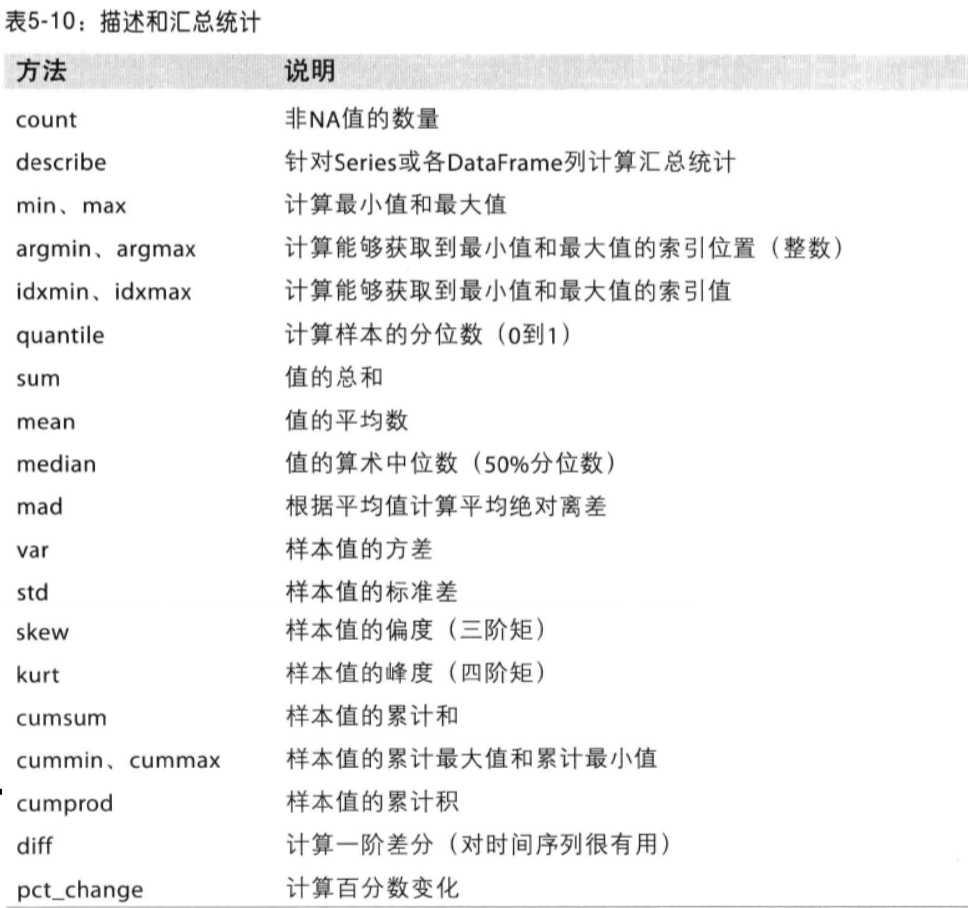

### 相关系数与协方差

—— se和df都有的

corr() 相关系数
cov() 协方差

—— df有的

corrwith(another, axis=?) 传入另一个se或df，可计算axis指定的轴与传入之间的corr

### 唯一、计数 和 isin

In [81]:
# unique
obj17 = Series(['c','a','d','a','a','b','b','c','c'])
obj17.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [82]:
# value_counts
obj17.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [83]:
# isin 成员是否在另一个集合中
obj17.isin(['b','c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

## 处理缺失数据

缺失的数据被用 np.nan 形式表示出来（打印输出时显示为NaN），python中的None值也会被pandas当作缺失处理。

In [84]:
# isnull
data18 = Series(['ab', np.nan, 'dd'])
data18

0     ab
1    NaN
2     dd
dtype: object

In [85]:
data18.isnull()

0    False
1     True
2    False
dtype: bool

In [87]:
data18[0] = None
data18.isnull()

0     True
1     True
2    False
dtype: bool

### dropna 滤除缺失数据

In [88]:
# series
data19 = Series(['ab', np.nan, 'dd'])
data19.dropna()

0    ab
2    dd
dtype: object

In [89]:
data19 # data19本身没有变。。。。。

0     ab
1    NaN
2     dd
dtype: object

In [91]:
# dataframe默认按行来滤除，即丢掉含有NaN的行，也可指定按列丢弃
frame20 = DataFrame([[1,2,3],[4,5,np.nan],[7,8,9],[np.nan,1,3]])
frame20

,0,1,2
0,1.0,2,3.0
1,4.0,5,NaN
2,7.0,8,9.0
3,NaN,1,3.0


In [92]:
frame20.dropna() # 丢掉含na的行

,0,1,2
0,1.0,2,3.0
2,7.0,8,9.0


In [93]:
frame20.dropna(axis=1) # 丢掉含na的列

,1
0,2
1,5
2,8
3,1


### 填充缺失数据

In [94]:
frame21 = DataFrame([[1,2,3],[4,5,np.nan],[7,8,9],[np.nan,1,3]])
frame21

,0,1,2
0,1.0,2,3.0
1,4.0,5,NaN
2,7.0,8,9.0
3,NaN,1,3.0


In [95]:
# fillna 将缺失值替换
frame21.fillna(888)

,0,1,2
0,1.0,2,3.0
1,4.0,5,888.0
2,7.0,8,9.0
3,888.0,1,3.0


In [96]:
# 传入一个字典，可以根据列的索引，填充不同的值
frame21.fillna({0:888, 2:999})
# 默认返回新对象，传入inplace=True就地修改

,0,1,2
0,1.0,2,3.0
1,4.0,5,999.0
2,7.0,8,9.0
3,888.0,1,3.0


In [97]:
# 也可以用ffill等插值方法
frame21.fillna(method='ffill', limit=2) #limit表示可填充的最大数量，可不指定

,0,1,2
0,1.0,2,3.0
1,4.0,5,3.0
2,7.0,8,9.0
3,7.0,1,3.0


## 层次化索引 （MultiIndex）
能以低维度形式处理高维度数据。
### 索引基本使用

In [2]:
# Series上的层次化索引
se22 = Series(np.random.randn(10),
             index=[['a','a','a','b','b','b','c','c','d','d'],
                   [1,2,3,1,2,3,1,2,2,3]])
se22

a  1   -0.710860
   2   -1.110299
   3    2.467909
b  1    0.035127
   2    1.444507
   3   -0.309462
c  1   -0.640674
   2   -0.186813
d  2    0.436191
   3    1.053822
dtype: float64

In [4]:
# 索引类型是多层次索引
se22.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [5]:
# 选取子集
se22['b']

1    0.035127
2    1.444507
3   -0.309462
dtype: float64

In [6]:
se22['b':'c']

b  1    0.035127
   2    1.444507
   3   -0.309462
c  1   -0.640674
   2   -0.186813
dtype: float64

In [7]:
# 还可以在"内层"进行选取（选取每个大集中的索引为2者）
se22[:, 2]

a   -1.110299
b    1.444507
c   -0.186813
d    0.436191
dtype: float64

In [8]:
# Data Frame
df22 = DataFrame(np.arange(12).reshape((4,3)),
                index=[['a','a','b','b'], [1,2,1,2]],
                columns=[['Ohio','Ohio','Colorado'],
                        ['Green','Red','Green']])
df22

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [9]:
# 可以为各层指定名字name
df22.index.names = ['key1', 'key2']
df22.columns.names = ['state', 'color']
df22

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [11]:
# 选取分组
df22['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### 重排分级顺序

In [12]:
# 可以更换索引级别
# swaplevel
df22

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [13]:
df22.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [14]:
# sortlevel
# 根据各个级别进行排序
df22.sortlevel()

C:\Users\xindo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  This is separate from the ipykernel package so we can avoid doing imports until


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

### 根据级别汇总统计

In [16]:
df22.sum(level='key2')
# 根据key2进行sum， 默认是操作0轴

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [17]:
df22.sum(level='color', axis=1) #操作1轴

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用df的列作为索引

In [18]:
# 可以将df中的某些列提出来，作为索引使用
df23 = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                 'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                 'd': [0, 1, 2, 0, 1, 2, 3]})
df23

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [19]:
# set_index
# 将某些列转换成行索引，注意默认这些列就会不再作为数据
df24 = df23.set_index(['c', 'd'])
df24

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [20]:
# 可以指定将这些列仍然作为数据
df25 = df23.set_index(['c', 'd'], drop=False)
df25

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [21]:
# 也可以将索引转换成列
# 使用reset_index
df23.reset_index()

,index,a,b,c,d
0,0,0,7,one,0
1,1,1,6,one,1
2,2,2,5,one,2
3,3,3,4,two,0
4,4,4,3,two,1
5,5,5,2,two,2
6,6,6,1,two,3




## 其他
### 整数索引
当索引值也为整数时，取元素用这种[2]的方式，方括号中使用整数，很容易混淆是选取下标2或是选取索引值为2. pandas认为这里都是按照索引值为2而不是下标来选取。

In [22]:
se26 = Series(['a','b','c'], index=[0,2,1])
se26

0    a
2    b
1    c
dtype: object

In [23]:
se26[2]

'b'

In [25]:
# 如果要按照下标，请使用iloc
se26.iloc[2]

'c'

In [26]:
# loc表示按标签内容
se26.loc[2]

'b'

**所以**

还是参见 [索引、选取和过滤](#索引、选取和过滤) 
乖乖用loc/iloc指定是按标签还是按下标，以及对于DataFrame，第一个参数指定行、第二个参数指定列，这样来清楚而有约定地来做吧。

### 面板数据
pd.Panel  
略